### Ch14 Figure3

In [1]:
# . It turns out that the color of the car has a slight impact on the clickthrough rate.

data = []
brands = ['Honda', 'Toyota', 'Ford', 'Chevy', 'Nissan']
colors = ['red' ,'black', 'silver', 'blue', 'dark-blue', 'white']
brands_models = {'Honda': ['Civic', 'Fit', 'CR-V', 'Accord', 'Odyssey'],
                 'Toyota': ['Camry', 'Corolla', 'Yaris', 'Prius', 'RAV4', '4Runner'],
                 'Ford': ['Focus', 'Mustang', 'Fiesta', 'Explorer', 'Escape'],
                 'Chevy': ['Camaro', 'Cruze', 'Impala', 'Malibu', 'Sonic'],
                 'Nissan': ['Juke', 'Sentra', 'Altima', 'Maxima', 'Versa', 'Pathfinder']}

for i in range(2000):
    
    brand = brands[rd.randint(0,len(brands)-1)]
    model = brands_models[brand][rd.randint(0, len(brands_models[brand])-1)]
    color = colors[rd.randint(0,len(colors)-1)]
    
    if rd.random() <= .2:
        click = 1
    else:
        click = 0
    
    if brand == 'Ford':
        if model == 'Mustang':
            if color == 'red':
                if rd.random() <= .6:
                    click = 1
                else:
                    click = 0
    data.append([i, brand, model, color, click])

    
df = pd.DataFrame(data, columns=['id', 'brand', 'model', 'color', 'click'])
# df.to_csv('csv_output/ch14_fig4.csv', index=False)
df = pd.read_csv('csv_output/ch14_fig4.csv')
df.head()

,id,brand,model,color,click
0,0,Nissan,Maxima,black,0
1,1,Honda,Fit,dark-blue,0
2,2,Ford,Fiesta,white,1
3,3,Chevy,Cruze,silver,1
4,4,Ford,Focus,blue,0


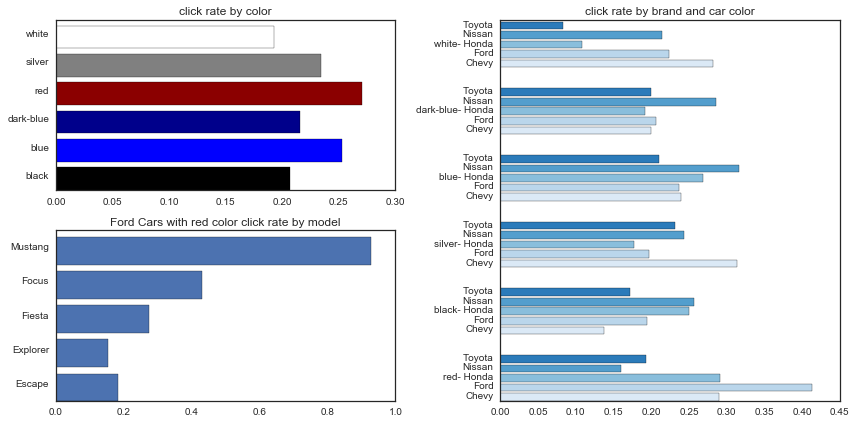

In [2]:
df = pd.read_csv('csv_output/ch14_fig4.csv')
brands = ['Honda', 'Toyota', 'Ford', 'Chevy', 'Nissan']
colors = ['red' ,'black', 'silver', 'blue', 'dark-blue', 'white']

%matplotlib inline
sns.set_style("white")

f, ax = plt.subplots(2,2, figsize=(12,6))
cm = sns.color_palette("Blues", 6)
# mean = df.groupby('day of week').sales.mean()
ax1 = plt.subplot2grid((2,2),(0,1), rowspan=2)

colors1 = ['white', 'grey', 'darkred', 'darkblue', 'blue', 'black'][::-1]

coloronly = df.groupby(['color']).click.mean().reset_index()
ax[0][0].barh(bottom=np.arange(6), width=coloronly.click, color=colors1);
ax[0][0].set_yticks(np.arange(6)+.5);
ax[0][0].set_yticklabels(coloronly.color);
ax[0][0].set_title('click rate by color');

dgb = df.groupby(['brand', 'color']).click.mean().reset_index()

ford = df.groupby(['brand', 'color','model']).click.mean().reset_index()
ford = ford[(ford.brand=='Ford') & (ford.color=='red')]
ax[1][0].barh(bottom = np.arange(5), width = ford.click)
ax[1][0].set_yticks(np.arange(5)+.5)
ax[1][0].set_yticklabels(ford.model)
ax[1][0].set_title('Ford Cars with red color click rate by model');


ticklabel = []
new = True
for x in range(len(colors)):
    ax1.barh(bottom = np.arange(5)+((x+1)*5)+(x*2), width=dgb[dgb['color'] == colors[x]].sort_values('brand')['click'], color=cm)
    b = ['Chevy', 'Ford', colors[x]+'- Honda', 'Nissan', 'Toyota']
    ticklabel.extend(b)
    ticklabel.extend(['', ''])

ax1.set_yticks(np.arange(5,45)+.5);
ax1.set_yticklabels(ticklabel);
ax1.set_title('click rate by brand and car color');

f.tight_layout()

f.savefig('svg_output/ch14_fig4.svg', format='svg')

Across all colors, red might have slightly higher click rate than the other colors. If drill down by brands, only Ford has an higher than average click rate given the red color than other brands. For example, for Nissan, blue is the color with highest click rate. If we further drill down by model of Fords with red color, only Mustang has extremly higher rate, other models are relatively lower.